In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


Import IOS Zooplankton data and create dataframe

In [3]:
ls '/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'

/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv


In [4]:
df=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2012-2015 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [5]:
df

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Branchiopoda,Diplostraca,Podonidae,Podon *sp. s1,12.22541,0.06113,51,2.63,0.67
1,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Cirripedia,Thecostraca,NaN,Cirripedia *sp. nauplii s1,30.56351,1.22254,51,2.63,0.67
2,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto pacifica juvenile s1,6.11270,1.44871,51,2.63,0.67
3,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. zoea s1,3.05635,0.07030,51,2.63,0.67
4,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,Hippolytidae,Hippolytidae *sp. mysis s2,0.09551,0.06017,51,2.63,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60225,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ctenophora,Tentaculata,Cydippida,Pleurobrachiidae,Pleurobrachia bachei s2,0.25316,0.31797,44,2.56,0.67
60226,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,48.60759,0.06319,44,2.56,0.67
60227,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Bivalvia,Pholadomyoida,NaN,Bivalvia *sp. veligers s1,21.60338,0.01296,44,2.56,0.67
60228,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Cephalopoda,Teuthida,Gonatidae,Berryteuthis magister s2,0.08439,0.46414,44,2.56,0.67


In [6]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [25]:
df['Abundance(#/m3)']

0        12.22541
1        30.56351
2         6.11270
3         3.05635
4         0.09551
           ...   
60225     0.25316
60226    48.60759
60227    21.60338
60228     0.08439
60229    10.80169
Name: Abundance(#/m3), Length: 60230, dtype: float64

Convert date to proper format

In [8]:
df['Date'][0],df['STN_TIME'][0]

('6/14/2012', '7:32')

In [9]:
df['Date'][1000:1020]

1000    6/15/2012
1001    6/15/2012
1002    6/15/2012
1003    6/15/2012
1004    6/15/2012
1005    6/15/2012
1006    6/15/2012
1007    6/15/2012
1008    6/15/2012
1009    6/15/2012
1010    6/15/2012
1011    6/15/2012
1012    6/15/2012
1013    6/15/2012
1014    6/15/2012
1015    6/15/2012
1016    6/15/2012
1017    6/15/2012
1018    6/15/2012
1019    6/15/2012
Name: Date, dtype: object

In [10]:
df['Date'][0].split('/')

['6', '14', '2012']

In [11]:
dateslist=list()

In [12]:
for el in df['Date']:
    dateslist.append(el.split('/'))

In [13]:
timeslist=list()
for el in df['STN_TIME']:
    timeslist.append(el.split(':'))

In [14]:
dts=list()
for ii,jj in zip(dateslist,timeslist):
    dts.append(dt.datetime(int(ii[2]),int(ii[0]),int(ii[1]),int(jj[0]),int(jj[1])))

In [15]:
df.loc[df.Twilight=='Daylight']['STN_TIME'].unique()

array(['7:32', '7:52', '3:30', '7:42', '7:49', '15:09', '16:30', '22:09',
       '22:27', '19:36', '19:53', '9:21', '9:35', '13:29', '13:45',
       '19:25', '19:43', '5:26', '5:43', '5:45', '5:47', '5:56', '5:59',
       '8:38', '8:39', '8:40', '8:41', '8:57', '11:10', '11:44', '11:45',
       '11:47', '11:48', '11:49', '12:40', '12:42', '15:14', '15:15',
       '15:16', '15:17', '15:18', '17:54', '17:55', '17:57', '17:58',
       '17:59', '5:39', '6:05', '14:47', '15:02', '19:13', '19:30',
       '14:32', '14:49', '20:04', '20:24', '20:27', '20:47', '9:37',
       '9:48', '13:57', '14:17', '19:41', '19:59', '7:18', '7:53', '9:25',
       '12:57', '13:09', '7:30', '7:45', '13:33', '13:36', '13:38',
       '10:00', '10:30', '11:00', '11:30', '12:30', '13:00', '13:30',
       '16:00', '17:00', '9:29', '10:26', '11:19', '13:39', '9:16',
       '10:04', '10:42', '11:03', '9:00', '9:41', '10:17', '10:40',
       '12:00', '9:33', '10:13', '11:11', '12:02', '12:32', '13:22',
       '9:57', '

In [16]:
df['dtUTC']=et.pac_to_utc(dts) #convert from Pac time to UTC

In [21]:
df['Order:'].unique()

array(['Diplostraca', 'Thecostraca', 'Amphipoda', 'Decapoda',
       'Euphausiacea', 'Calanoida', 'Cyclopoida', 'Poecilostomatoida',
       'Halocyprida', 'Aphragmophora', 'Copelata', 'Leptothecate',
       'Siphonophorae', 'Trachylina', 'Cydippida', nan, 'Pholadomyoida',
       'Neotaenioglossa', 'Thecosomata', 'Aciculata', 'Canalipalpata',
       'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida',
       'Harpacticoida', 'Pleuronectiformes', 'Tricladida', 'Myodocopida',
       'Phaeogromia', 'Noctilucales', 'Octopoda', 'Actiniaria',
       'Foraminiferida', 'Monstrilloida', 'Oligotrichida', 'Mysida',
       'Acariformes', 'Lophogastrida', 'Ophidiiformes',
       'Thalassocalycida', 'Doliolida', 'Lepadomorpha', 'Cephalaspidea',
       'Sygnathiformes'], dtype=object)

In [27]:
SpeciesNames = df['Name'].unique()[1:1000]
SpeciesNames.sort()
print(SpeciesNames)

['Acartia *sp.  1' 'Acartia *sp.  2' 'Acartia *sp.  3' 'Acartia *sp.  4'
 'Acartia hudsonica  5' 'Acartia hudsonica  6F' 'Acartia hudsonica  6M'
 'Acartia longiremis  3' 'Acartia longiremis  4' 'Acartia longiremis  5'
 'Acartia longiremis  6F' 'Acartia longiremis  6M' 'Aegina citrea  s1'
 'Aegina citrea  s2' 'Aegina citrea  s3' 'Aeginidae *sp.  s1'
 'Aequorea *sp.  s1' 'Aequorea *sp.  s2' 'Aequorea *sp.  s3'
 'Aetideidae *sp.  1' 'Aetideidae *sp.  2' 'Aetideidae *sp.  3'
 'Aetideus *sp.  1' 'Aetideus *sp.  2' 'Aetideus *sp.  3'
 'Aetideus *sp.  4' 'Aetideus *sp.  5' 'Aetideus divergens  2'
 'Aetideus divergens  3' 'Aetideus divergens  4' 'Aetideus divergens  5'
 'Aetideus divergens  6F' 'Aetideus divergens  6M' 'Aetideus pacificus  5'
 'Aetideus pacificus  6F' 'Aetideus pacificus  6M' 'Aglantha digitale  s1'
 'Aglantha digitale  s2' 'Aglantha digitale  s3' 'Alacia *sp.  s1'
 'Alacia minor  s1' 'Alacia pseudoalata  s1'
 'Ammodytes hexapterus flexion s2' 'Ammodytes hexapterus postflexion

## Start by creating a group of zooplankton taxa of interest

In [29]:
colList=('Anomura *sp. megalops s1',
 'Anomura *sp. zoea s1' ,'Anomura *sp. zoea s2', 'Axiidae *sp.  s1', 'Axiidae *sp. mysis s2',
 'Axiidae *sp. zoea s1' ,'Axiidae *sp. zoea s2','Brachyura *sp. zoea s1',
'Calanoida *sp.  1', 'Calanoida *sp.  2' ,'Calanoida *sp.  3',
 'Calanoida *sp.  4' ,'Calanoida *sp.  6M', 'Calanus *sp.  1',
 'Calanus *sp.  2', 'Calanus *sp.  3' ,'Calanus *sp.  4',
 'Calanus *sp. nauplii s1', 'Calanus marshallae  2' ,'Calanus marshallae  3',
 'Calanus marshallae  4' ,'Calanus marshallae  5' ,'Calanus marshallae  6F',
 'Calanus marshallae  6M' ,'Calanus pacificus  2' ,'Calanus pacificus  3',
 'Calanus pacificus  4' ,'Calanus pacificus  5', 'Calanus pacificus  6F',
 'Calanus pacificus  6M','Calliopius *sp.  s1' ,'Calliopius *sp.  s2', 'Calliopius *sp.  s3',
 'Calliopius pacificus  s1' ,'Calliopius pacificus  s2',
 'Calliopius pacificus  s3', 'Cancer *sp. megalops s1',
 'Cancer *sp. zoea s1' ,'Cancer *sp. zoea s2', 'Cancer magister megalops s2',
 'Cancer magister zoea s1' ,'Cancer magister zoea s2',
 'Cancer oregonensis megalops s1', 'Cancer oregonensis megalops s2',
 'Cancer productus megalops s1' ,'Cancer productus megalops s2',
 'Cancer productus zoea s1' ,'Cancer productus zoea s2','Caridea *sp.  s3' ,'Caridea *sp. mysis s1',
 'Caridea *sp. mysis s2', 'Caridea *sp. mysis s3' ,'Caridea *sp. zoea s1',
 'Caridea *sp. zoea s2', 'Chaetognatha *sp.  s3' ,'Chaetognatha *sp. juvenile s1',
 'Chaetognatha *sp. juvenile s2','Chionoecetes *sp. megalops s1',
 'Chionoecetes *sp. megalops s2', 'Chionoecetes *sp. zoea s1','Corycaeus anglicus  3',
 'Corycaeus anglicus  4' ,'Corycaeus anglicus  5' ,'Corycaeus anglicus  6F',
 'Corycaeus anglicus  6M' ,'Crangonidae *sp. mysis s1',
 'Crangonidae *sp. mysis s2' ,'Crangonidae *sp. mysis s3',
 'Crangonidae *sp. zoea s1', 'Crangonidae *sp. zoea s2','Cyphocaris *sp.  s1',
 'Cyphocaris challengeri  s1' ,'Cyphocaris challengeri  s2',
 'Cyphocaris challengeri  s3', 'Decapoda *sp. zoea s1','Eucalanus *sp.  1',
 'Eucalanus *sp.  2' ,'Eucalanus *sp.  3' ,'Eucalanus *sp. nauplii s1',
 'Eucalanus bungii  3', 'Eucalanus bungii  4', 'Eucalanus bungii  4F',
 'Eucalanus bungii  4M', 'Eucalanus bungii  5F', 'Eucalanus bungii  5M',
 'Eucalanus bungii  6F', 'Eucalanus bungii  6M',
 'Eucalanus californicus  5F', 'Eucalanus californicus  6F','Euphausia pacifica  F',
 'Euphausia pacifica  M' ,'Euphausia pacifica  s2', 'Euphausia pacifica  s3',
 'Euphausia pacifica eggs s1' ,'Euphausia pacifica nauplii s1',
 'Euphausia pacifica zoea s1', 'Euphausiacea *sp.  s2',
 'Euphausiidae *sp. eggs s1', 'Euphausiidae *sp. nauplii s1',
 'Euphausiidae *sp. protozoea (or calyptopis) s1',
 'Euphausiidae *sp. zoea (or furcilia) s1','Galatheidae *sp. zoea s1', 'Galatheidae *sp. zoea s2',
 'Gammaridea *sp.  s1', 'Gammaridea *sp.  s2','Grapsidae *sp. megalops s1', 'Grapsidae *sp. zoea s1','Hemigrapsus *sp. megalops s1'
 ,'Hemigrapsus *sp. zoea s1','Hyperia medusarum  F', 'Hyperia medusarum  M',
 'Hyperia medusarum  s1', 'Hyperia medusarum  s2' ,'Limacina helicina  s0',
 'Limacina helicina  s1' ,'Limacina helicina  s2','Lithodidae *sp. megalops s1',
 'Lithodidae *sp. zoea s1', 'Lithodidae *sp. zoea s2','Lophopanopeus *sp. megalops s1','Majidae *sp. megalops s1',
 'Majidae *sp. megalops s2', 'Majidae *sp. zoea s1','Metridia *sp.  1',
 'Metridia *sp.  2', 'Metridia *sp.  3' ,'Metridia *sp.  4',
 'Metridia *sp.  5', 'Metridia *sp.  6F', 'Metridia *sp.  6M',
 'Metridia pacifica  3' ,'Metridia pacifica  4' ,'Metridia pacifica  5F',
 'Metridia pacifica  5M' 'Metridia pacifica  6F' 'Metridia pacifica  6M'
 'Metridia pseudopacifica  5', 'Metridia pseudopacifica  6F',
 'Metridia pseudopacifica  6M' ,'Munida *sp. zoea s1' ,'Munida *sp. zoea s2',
 'Munida quadrispina megalops s2', 'Munida quadrispina megalops s3','Neocalanus *sp.  4',
 'Neocalanus *sp. eggs s1', 'Neocalanus *sp. nauplii s1',
 'Neocalanus cristatus  2', 'Neocalanus cristatus  3',
 'Neocalanus cristatus  4', 'Neocalanus cristatus  5',
 'Neocalanus cristatus  6F' ,'Neocalanus cristatus  6M',
 'Neocalanus plumchrus  1', 'Neocalanus plumchrus  2',
 'Neocalanus plumchrus  3', 'Neocalanus plumchrus  4',
 'Neocalanus plumchrus  5', 'Neocalanus plumchrus  6F',
 'Neocalanus plumchrus  6M' ,'Neotrypaea *sp. mysis s1',
 'Neotrypaea *sp. mysis s2', 'Neotrypaea *sp. zoea s1',
 'Neotrypaea *sp. zoea s2', 'Oikopleura *sp.  s1', 'Oikopleura *sp.  s2',
 'Oikopleura dioica  s1' ,'Oikopleura dioica  s2',
 'Oikopleura labradoriensis  s1', 'Oikopleura labradoriensis  s2',
 'Oikopleura labradoriensis  s3', 'Oregonia *sp. megalops s1','Paguridae *sp. megalops s1' ,'Paguridae *sp. megalops s2',
 'Paguridae *sp. zoea s1', 'Paguridae *sp. zoea s2',
 'Pandalidae *sp. mysis s2', 'Pandalidae *sp. mysis s3',
 'Pandalidae *sp. zoea s1', 'Pandalidae *sp. zoea s2',
 'Pandalopsis dispar  s2' ,'Pandalopsis dispar  s3' ,'Pandalus danae  s2',
 'Pandalus danae  s3', 'Pandalus eous  s3', 'Pandalus jordani  s2',
 'Pandalus jordani  s3', 'Pandalus stenolepis  s1',
 'Pandalus stenolepis  s2', 'Pandalus stenolepis  s3',
 'Pandalus tridens  s2' ,'Pandalus tridens  s3','Parasagitta elegans  s2', 'Parasagitta elegans  s3',
 'Parasagitta elegans juvenile s1', 'Parasagitta euneritica  s2',
 'Parasagitta euneritica  s3','Pinnixa *sp. megalops s1', 'Pinnotheres *sp. megalops s1',
 'Pinnotheridae *sp. megalops s1', 'Pinnotheridae *sp. megalops s2',
 'Pinnotheridae *sp. zoea s1' ,'Pinnotheridae *sp. zoea s2',
 'Pisidae zoea zoea s1', 'Porcellanidae *sp. megalops s1', 'Porcellanidae *sp. zoea s1',
 'Porcellanidae *sp. zoea s2', 'Primno *sp.  s1', 'Primno abyssalis  F',
 'Primno abyssalis  M', 'Primno abyssalis  s1', 'Primno abyssalis  s2',
 'Primno brevidens  s1' ,'Pugettia *sp. megalops s1', 'Themisto *sp.  s1',
 'Themisto pacifica  F', 'Themisto pacifica  M', 'Themisto pacifica  s2',
 'Themisto pacifica juvenile s1', 'Thysanoessa *sp.  s1',
 'Thysanoessa *sp.  s2', 'Thysanoessa *sp. nauplii s1',
 'Thysanoessa *sp. zoea s1', 'Thysanoessa longipes  F',
 'Thysanoessa longipes  M', 'Thysanoessa longipes  s2',
 'Thysanoessa longipes  s3' ,'Thysanoessa longipes zoea s1',
 'Thysanoessa raschii  F', 'Thysanoessa raschii  M',
 'Thysanoessa raschii  s2' ,'Thysanoessa raschii zoea s1',
 'Thysanoessa spinifera  F', 'Thysanoessa spinifera  M',
 'Thysanoessa spinifera  s2', 'Thysanoessa spinifera  s3',
 'Thysanoessa spinifera eggs s1', 'Thysanoessa spinifera nauplii s1',
 'Thysanoessa spinifera zoea s1','Xanthidae *sp. megalops s1',
 'Xanthidae *sp. zoea s1')


In [30]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC'],
      dtype='object')

In [31]:
dtsutc=et.pac_to_utc(dts)

In [32]:
df.loc[0]

Key                                                      IOS2012005000901
region_name                                    Northern Strait of Georgia
Station                                                                22
PROJECT                                                         Str. Geo.
lon                                                              -124.272
lat                                                                 49.67
Date                                                            6/14/2012
STN_TIME                                                             7:32
Twilight                                                         Daylight
Net_Type                                                         SCOR VNH
Mesh_Size(um)                                                         236
Net_Mouth_Dia(m)                                                     0.56
DEPTH_STRT1                                                            50
DEPTH_END1                            

In [33]:
towIDlist=['Key', 'region_name', 'Station',  'lon', 'lat', 'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)']

In [34]:
towIDlist2=['Key', 'region_name', 'Station',  'lon', 'lat', 'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)','CTD']

In [35]:
len(df.groupby(towIDlist)),len(df.groupby(towIDlist2)),len(df.groupby(['Key']))

(654, 12694, 654)

In [36]:
# Key is a unique identifier for each tow
# do not group by CTD due to NaN values

### Create an abundance dataframe

In [53]:
biomassDF=df.groupby(towIDlist,as_index=False).first()\
     .loc[:,towIDlist].copy(deep=True)

In [54]:
biomassDF

,Key,region_name,Station,lon,lat,dtUTC,Twilight,Net_Type,Mesh_Size(um),DEPTH_STRT1,DEPTH_END1,Bottom Depth(m)
0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:32:00,Daylight,SCOR VNH,236,50,0,352
1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:52:00,Daylight,SCOR VNH,236,345,0,352
2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:00:00,Night,SCOR VNH,236,50,0,307
3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:05:00,Night,SCOR VNH,236,300,0,307
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,2012-06-15 10:00:00,Night,SCOR VNH,236,50,0,325
...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,2015-04-27 17:37:00,Daylight,SCOR VNH,236,58,0,72
650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,2015-04-30 19:00:00,Daylight,SCOR VNH,236,54,0,64
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,2015-07-09 19:25:00,Daylight,SCOR VNH,236,42,0,64
652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,2015-07-27 19:06:00,Daylight,SCOR VNH,236,28,0,60


In [44]:
def getabundance(colname,key,origdf):        
    abundanceArray=origdf.loc[(origdf.Key==key)&(origdf['Name']==colname),
                    ['Abundance(#/m3)']]
    abundance=np.nansum(abundanceArray)
    
    return abundance

In [55]:
for icol in colList:
    biomassDF[icol]=[getabundance(icol,ikey,df) for ikey in biomassDF['Key']]

In [56]:
biomassDF

,Key,region_name,Station,lon,lat,dtUTC,Twilight,Net_Type,Mesh_Size(um),DEPTH_STRT1,...,Thysanoessa raschii zoea s1,Thysanoessa spinifera F,Thysanoessa spinifera M,Thysanoessa spinifera s2,Thysanoessa spinifera s3,Thysanoessa spinifera eggs s1,Thysanoessa spinifera nauplii s1,Thysanoessa spinifera zoea s1,Xanthidae *sp. megalops s1,Xanthidae *sp. zoea s1
0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:32:00,Daylight,SCOR VNH,236,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:52:00,Daylight,SCOR VNH,236,345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:00:00,Night,SCOR VNH,236,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:05:00,Night,SCOR VNH,236,300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,2012-06-15 10:00:00,Night,SCOR VNH,236,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,2015-04-27 17:37:00,Daylight,SCOR VNH,236,58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,2015-04-30 19:00:00,Daylight,SCOR VNH,236,54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,2015-07-09 19:25:00,Daylight,SCOR VNH,236,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,2015-07-27 19:06:00,Daylight,SCOR VNH,236,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
biomassDF['Neocalanus plumchrus  5'].unique()

array([0.0000000e+00, 6.2024100e+00, 2.2715170e+01, 3.6118510e+01,
       8.9290000e-02, 2.7705630e+01, 8.3470000e-02, 3.0441000e-01,
       2.9371270e+01, 2.8011000e-01, 1.3032730e+01, 5.2763000e-01,
       1.4560300e+00, 1.1272727e+02, 8.5840000e-02, 1.7434600e+00,
       9.6108100e+00, 1.5137976e+02, 2.1333333e+02, 1.6914286e+02,
       2.8800000e+00, 7.4285700e+00, 1.4933330e+01, 9.2857000e-01,
       6.6667000e-01, 1.1428600e+00, 1.6601800e+00, 1.5578090e+01,
       2.7259260e+01, 2.7826100e+00, 2.3529000e-01, 9.2307700e+00,
       3.1111100e+00, 2.6666700e+00, 2.4615400e+00, 1.1111000e-01,
       1.6667000e-01, 7.6521740e+01, 1.2190480e+01, 1.4545500e+00,
       2.9090900e+00, 1.9231000e-01, 3.3586006e+02, 4.8567630e+01,
       7.7108430e+01, 1.4296350e+01, 4.0093970e+01, 3.0666000e+00,
       1.1130435e+02, 7.6429300e+00, 3.3137210e+01, 1.6656657e+02,
       6.3427770e+01, 2.2737000e-01, 7.6320000e-02, 3.0942790e+01,
       6.2196300e+00, 2.0353000e+00, 1.2587810e+01, 1.6856890e

In [59]:
biomassDF.keys()

Index(['Key', 'region_name', 'Station', 'lon', 'lat', 'dtUTC', 'Twilight',
       'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1',
       ...
       'Thysanoessa raschii zoea s1', 'Thysanoessa spinifera  F',
       'Thysanoessa spinifera  M', 'Thysanoessa spinifera  s2',
       'Thysanoessa spinifera  s3', 'Thysanoessa spinifera eggs s1',
       'Thysanoessa spinifera nauplii s1', 'Thysanoessa spinifera zoea s1',
       'Xanthidae *sp. megalops s1', 'Xanthidae *sp. zoea s1'],
      dtype='object', length=249)

### Convert Abundances to new Biomass values using Puget Sound LW Regressions

#### Neocalanus conversion: C (ug) =  (2.00*[Length (mm)]^3.92)*0.5

In [103]:
biomassDF['Neocalanus plumchrus  5']=biomassDF['Neocalanus plumchrus  5']*(2.00*(3.8**3.92))*0.5/1000

In [104]:
biomassDF['Neocalanus plumchrus 5']

0      0.000000
1      1.162284
2      4.256648
3      6.768330
4      0.016732
         ...   
649    0.000000
650    0.000000
651    0.000000
652    0.000000
653    0.000000
Name: Neocalanus plumchrus 5, Length: 654, dtype: float64

Import model data for comparison with observations

In [708]:
import netCDF4 as nc

In [709]:
ftemp=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [710]:
ftemp.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [711]:
ftemp.variables['e3t_0']

<class 'netCDF4._netCDF4.Variable'>
float64 e3t_0(t, z, y, x)
    _FillValue: nan
    standard_name: e3t_0
    long_name: grid spacing on T-grid in w direction
    units: m
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling on

In [712]:
ftemp.variables['e3t_1d'][:]

masked_array(data=[[ 1.00000115,  1.00000501,  1.00001253,  1.00002718,
                     1.0000557 ,  1.00011125,  1.00021946,  1.0004302 ,
                     1.00084067,  1.00164012,  1.0031971 ,  1.00622914,
                     1.01213271,  1.02362358,  1.04597551,  1.08940061,
                     1.17356428,  1.33592899,  1.64636781,  2.22990285,
                     3.29248567,  5.11998508,  7.97451506, 11.8252972 ,
                    16.10792044, 19.95870258, 22.81323256, 24.64073198,
                    25.70331479, 26.28684983, 26.59728865, 26.75965336,
                    26.84381704, 26.88724213, 26.90959407, 26.92108493,
                    26.9269885 , 26.93002054, 26.93157752, 26.93237697]],
             mask=False,
       fill_value=1e+20)

In [713]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2014,1,1)
end_date = dt.datetime(2016,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [714]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [715]:
biomassDF.rename(columns={'lon':'Lon','lat':'Lat'},inplace=True)

In [716]:
biomassDF.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'dtUTC', 'Twilight',
       'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1',
       'Bottom Depth(m)', 'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida',
       'Cyclopoida', 'Poecilostomatoida', 'Copelata', 'Harpacticoida'],
      dtype='object')

In [717]:
biomassDF.rename(columns={'DEPTH_STRT1':'Z_lower','DEPTH_END1':'Z_upper'},inplace=True)

In [718]:
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])

Need to convert biomass from mg DW to mg C and then convert to N using a known C:N

In [719]:
biomassDF['Amphipoda']=biomassDF['Amphipoda']*0.45/8.5
biomassDF['Decapoda']=biomassDF['Decapoda']*0.45/8.5
biomassDF['Euphausiacea']=biomassDF['Euphausiacea']*0.45/8.5
biomassDF['Calanoida']=biomassDF['Calanoida']*0.45/8.5
biomassDF['Cyclopoida']=biomassDF['Cyclopoida']*0.45/8.5
biomassDF['Poecilostomatoida']=biomassDF['Poecilostomatoida']*0.45/8.5
biomassDF['Copelata']=biomassDF['Copelata']*0.45/8.5
biomassDF['Harpacticoida']=biomassDF['Harpacticoida']*0.45/8.5



In [720]:
biomassDF

,Key,region_name,Station,Lon,Lat,dtUTC,Twilight,Net_Type,Mesh_Size(um),Z_lower,...,Amphipoda,Decapoda,Euphausiacea,Calanoida,Cyclopoida,Poecilostomatoida,Copelata,Harpacticoida,Year,YD
0,IOS2012005000901,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:32:00,Daylight,SCOR VNH,236,50,...,0.076696,0.006907,0.034576,0.752761,0.018818,0.031552,0.048542,0.0,2012,166
1,IOS2012005001001,Northern Strait of Georgia,22,-124.272,49.670,2012-06-14 14:52:00,Daylight,SCOR VNH,236,345,...,0.136227,0.012489,0.008934,0.939940,0.020067,0.012572,0.061310,0.0,2012,166
2,IOS2012005002101,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:00:00,Night,SCOR VNH,236,50,...,0.447609,0.305354,0.004087,3.069487,0.062593,0.016836,0.001015,0.0,2012,166
3,IOS2012005002201,Northern Strait of Georgia,11,-124.722,49.710,2012-06-14 07:05:00,Night,SCOR VNH,236,300,...,1.248227,0.195406,0.226123,3.611314,0.070272,0.030914,0.007436,0.0,2012,166
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.499,49.466,2012-06-15 10:00:00,Night,SCOR VNH,236,50,...,6.581345,1.312549,0.766465,1.808818,0.041113,0.007865,0.019361,0.0,2012,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.345,48.394,2015-04-27 17:37:00,Daylight,SCOR VNH,236,58,...,0.095961,0.049445,0.000546,0.327888,0.000101,0.000808,0.036776,0.0,2015,117
650,SOO2015095000401,Tidal Mixed,CB01,-123.318,48.344,2015-04-30 19:00:00,Daylight,SCOR VNH,236,54,...,0.281253,0.133391,0.001221,0.557729,0.000226,0.002533,0.025326,0.0,2015,120
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.345,48.395,2015-07-09 19:25:00,Daylight,SCOR VNH,236,42,...,0.000000,0.029676,0.001396,0.304505,0.000000,0.001706,0.175227,0.0,2015,190
652,SOO2015095000701,Tidal Mixed,CB01,-123.318,48.344,2015-07-27 19:06:00,Daylight,SCOR VNH,236,28,...,0.068771,0.082256,0.003464,0.115727,0.000285,0.001101,0.179723,0.0,2015,208


In [721]:
data=et.matchData(biomassDF,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

In [722]:
data

,Key,region_name,Station,Lon,Lat,dtUTC,Twilight,Net_Type,Mesh_Size(um),Z_lower,...,Copelata,Harpacticoida,Year,YD,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
0,PBS2014016000801,Juan de Fuca,JF03,-124.051,48.388,2014-03-07 19:01:00,Daylight,Bongo VNH,253,45,...,0.056633,0.000000,2014,66,342,94,0.049066,0.286660,0,23
1,PBS2014016004401,Central Strait of Georgia,GS04,-123.311,48.898,2014-03-09 18:57:00,Daylight,Bongo VNH,253,120,...,0.005309,0.000000,2014,68,388,265,0.065740,0.263313,0,27
2,PBS2014016005201,Central Strait of Georgia,GS08,-123.580,49.045,2014-03-09 23:57:00,Daylight,Bongo VNH,253,145,...,0.010529,0.000000,2014,68,436,244,0.045737,0.193986,0,28
3,IOS2014003000101,Central Strait of Georgia,GEO1,-123.744,49.250,2014-03-10 02:08:00,Daylight,SCOR VNH,236,390,...,0.002351,0.000000,2014,69,487,246,0.021994,0.094057,0,37
4,PBS2014016011401,Central Strait of Georgia,GS20,-123.484,49.068,2014-03-13 21:12:00,Daylight,Bongo VNH,253,150,...,0.007715,0.000000,2014,72,433,261,0.059742,0.211711,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.287,49.655,2015-10-05 18:43:00,Daylight,Ring VNH,250,150,...,0.099220,0.000000,2015,278,604,217,0.057682,0.424223,0,28
462,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.666,49.692,2015-10-05 19:15:00,Daylight,Ring VNH,250,145,...,0.033571,0.000000,2015,278,639,166,0.058821,0.396426,0,28
463,PSF2015098005801,Baynes Sound,BS-1,-124.867,49.608,2015-10-05 20:38:00,Daylight,Ring VNH,250,35,...,0.583457,0.008621,2015,278,636,126,0.194869,1.209480,0,22
464,PSF2015097005101,Nearshore-North East,IS-2,-124.083,49.637,2015-10-05 20:40:00,Daylight,Ring VNH,250,31,...,6.311266,0.000000,2015,278,587,245,0.159315,1.060016,0,21


In [723]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [872]:
data['L10Amphipoda']=logt(data['Amphipoda'])
data['L10Decapoda']=logt(data['Decapoda'])
data['L10Euphausiacea']=logt(data['Euphausiacea'])
data['L10Calanoida']=logt(data['Calanoida'])
data['L10Cyclopoida']=logt(data['Cyclopoida'])
data['L10Poecilostomatoida']=logt(data['Poecilostomatoida'])
data['L10Copelata']=logt(data['Copelata'])
data['L10Harpacticoida']=logt(data['Harpacticoida'])
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton'])
data['L10mod_microzooplankton']=logt(data['mod_microzooplankton'])



Figure showing observation locations of IOS zooplankton sampling

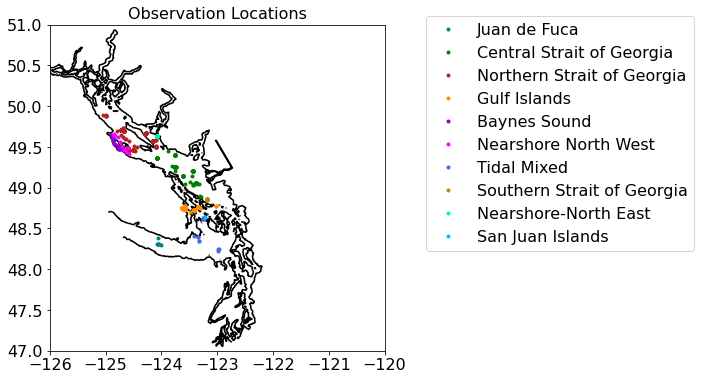

In [873]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue')
datreg=dict()
for ind, iregion in enumerate(data.region_name.unique()):
    datreg[iregion] = data.loc[data.region_name==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1.1, 1.05))




In [ ]:

###



In [874]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [875]:
data

,Key,region_name,Station,Lon,Lat,dtUTC,Twilight,Net_Type,Mesh_Size(um),Z_lower,...,L10Euphausiacea,L10Calanoida,L10Cyclopoida,L10Poecilostomatoida,L10Copelata,L10Harpacticoida,L10mod_mesozooplankton,L10mod_microzooplankton,yd,Month
0,PBS2014016000801,Juan de Fuca,JF03,-124.051,48.388,2014-03-07 19:01:00,Daylight,Bongo VNH,253,45,...,-0.782453,0.002528,-2.124105,-2.939369,-1.239327,-3.000000,-0.541120,-1.300459,66,3
1,PBS2014016004401,Central Strait of Georgia,GS04,-123.311,48.898,2014-03-09 18:57:00,Daylight,Bongo VNH,253,120,...,-3.000000,-0.264251,-2.517379,-2.642446,-2.200007,-3.000000,-0.577882,-1.175612,68,3
2,PBS2014016005201,Central Strait of Georgia,GS08,-123.580,49.045,2014-03-09 23:57:00,Daylight,Bongo VNH,253,145,...,-1.843864,-0.664996,-2.651730,-2.873964,-1.938211,-3.000000,-0.709997,-1.330342,68,3
3,IOS2014003000101,Central Strait of Georgia,GEO1,-123.744,49.250,2014-03-10 02:08:00,Daylight,SCOR VNH,236,390,...,-2.875860,-0.395078,-1.947320,-2.913556,-2.474810,-3.000000,-1.022015,-1.638381,69,3
4,PBS2014016011401,Central Strait of Georgia,GS20,-123.484,49.068,2014-03-13 21:12:00,Daylight,Bongo VNH,253,150,...,-1.883775,-0.189440,-2.092513,-2.736016,-2.059727,-3.000000,-0.672211,-1.216509,72,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.287,49.655,2015-10-05 18:43:00,Daylight,Ring VNH,250,150,...,-1.418398,-0.342134,-1.720195,-2.382229,-0.999047,-3.000000,-0.371383,-1.231496,278,10
462,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.666,49.692,2015-10-05 19:15:00,Daylight,Ring VNH,250,145,...,0.141457,0.172758,-1.691277,-2.518515,-1.461287,-3.000000,-0.400744,-1.223148,278,10
463,PSF2015098005801,Baynes Sound,BS-1,-124.867,49.608,2015-10-05 20:38:00,Daylight,Ring VNH,250,35,...,-3.000000,-0.108270,-0.626575,-1.913368,-0.233247,-2.016759,0.082958,-0.708035,278,10
464,PSF2015097005101,Nearshore-North East,IS-2,-124.083,49.637,2015-10-05 20:40:00,Daylight,Ring VNH,250,31,...,-2.597789,-0.473448,-1.664176,-1.746149,0.800185,-3.000000,0.025722,-0.795025,278,10


In [876]:
data.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'dtUTC', 'Twilight',
       'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper', 'Bottom Depth(m)',
       'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida', 'Cyclopoida',
       'Poecilostomatoida', 'Copelata', 'Harpacticoida', 'Year', 'YD', 'j',
       'i', 'mod_microzooplankton', 'mod_mesozooplankton', 'k_upper',
       'k_lower', 'L10Amphipoda', 'L10Decapoda', 'L10Euphausiacea',
       'L10Calanoida', 'L10Cyclopoida', 'L10Poecilostomatoida', 'L10Copelata',
       'L10Harpacticoida', 'L10mod_mesozooplankton', 'L10mod_microzooplankton',
       'yd', 'Month'],
      dtype='object')

In [877]:
data['Calanoida']

0      1.004838
1      0.543188
2      0.215274
3      0.401645
4      0.645487
         ...   
461    0.453848
462    1.487530
463    0.778345
464    0.335164
465    1.797932
Name: Calanoida, Length: 466, dtype: float64

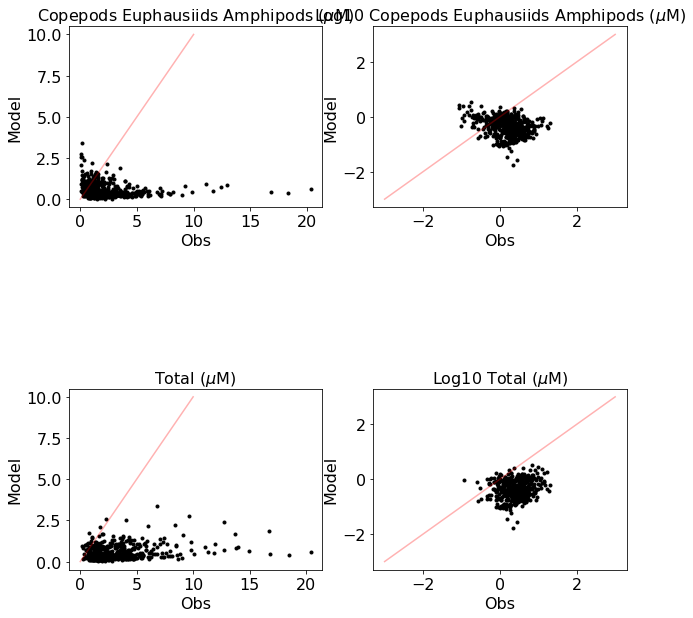

In [878]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=1)
ax=ax.flatten()
ax[0].plot(data['Calanoida']+data['Euphausiacea']+data['Amphipoda'],data['mod_mesozooplankton'],'k.')
ax[0].set_title('Copepods Euphausiids Amphipods ($\mu$M)')
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].plot((0,10),(0,10),'r-',alpha=.3)

ax[1].plot(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']),logt(data['mod_mesozooplankton']),'k.')
ax[1].set_title('Log10 Copepods Euphausiids Amphipods ($\mu$M)')
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].plot((-3,3),(-3,3),'r-',alpha=.3)

ax[2].plot(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']+data['Decapoda']+data['Copelata'],data['mod_mesozooplankton'],'k.')
ax[2].set_title('Total ($\mu$M)')
ax[2].set_xlabel('Obs')
ax[2].set_ylabel('Model')
ax[2].plot((0,10),(0,10),'r-',alpha=.3)

ax[3].plot(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']+data['Decapoda']+data['Copelata']),logt(data['mod_mesozooplankton']),'k.')
ax[3].set_title('Log10 Total ($\mu$M)')
ax[3].set_xlabel('Obs')
ax[3].set_ylabel('Model')
ax[3].plot((-3,3),(-3,3),'r-',alpha=.3)

In [912]:
#fig,ax=plt.subplots(1,1,figsize=(10,10))
#ax.plot((data['L10Calanoida']),(data['L10mod_mesozooplankton']),'k.')
#ax.set_title('Log10 Total ($\mu$M)')
#ax.set_xlabel('Obs')
#ax.set_ylabel('Model')
#ax.plot((-3,3),(-3,3),'r-',alpha=.3)

In [880]:
def yd(idt):
    if type(idt)==dt.datetime:
        yd=(idt-dt.datetime(idt.year-1,12,31)).days
    else: # assume array or pandas
        yd=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in idt]
    return yd

data['yd']=yd(data['dtUTC'])
data['Year']=[ii.year for ii in data['dtUTC']]

#### By Day of Year

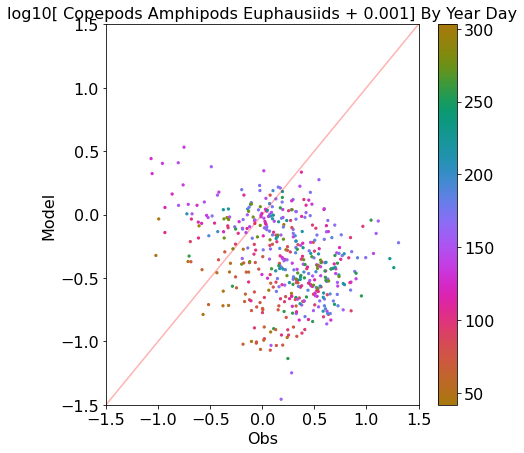

In [911]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter(logt(data['Calanoida']+data['Euphausiacea']+data['Amphipoda']),logt(data['mod_mesozooplankton']),
          c=data['yd'],s=5,cmap=cmocean.cm.phase)

ax.set_title('log10[ Copepods Amphipods Euphausiids + 0.001] By Year Day')
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5);
fig.colorbar(m)

In [882]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [883]:


def byRegion(ax,obsvar,modvar,lims):
    SoG=[]
    for ind, iregion in enumerate(data.region_name.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SoG0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SoG.append(SoG0)
    l=ax.legend(handles=[ip[0][0] for ip in SoG])
    ax.set_xlabel('Obs')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SoG,l



In [884]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    SoG=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SoG=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SoG=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SoG=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

In [885]:
#obsvar='L10Calanoida'
#modvar='L10mod_mesozooplankton'

### Plots of Calanoid copepods vs. model mesozooplankton 2015

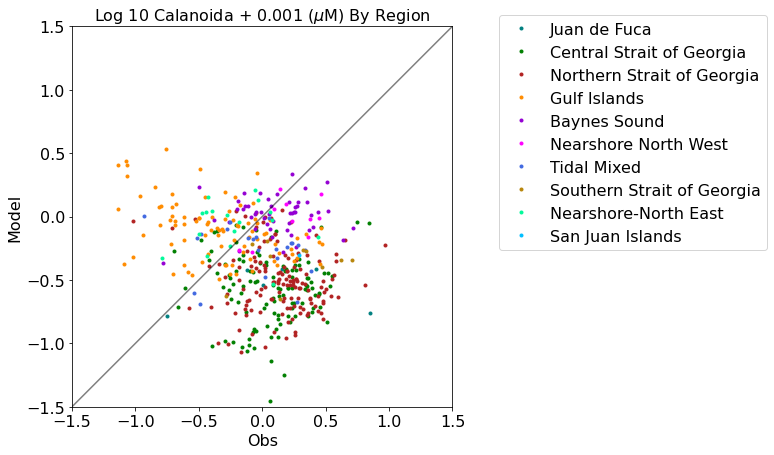

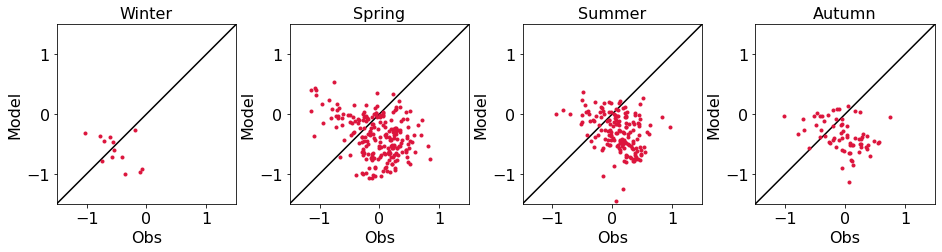

In [913]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

             
SoG,l=byRegion(ax,'L10Calanoida','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Calanoida + 0.001 ($\mu$M) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Calanoida','L10mod_mesozooplankton',(-1.5,1.5))


#### 

In [ ]:
#obsvar='Euphausiacea'
#modvar='mod_mesozooplankton'

### Plots of Euphausiids vs. model mesozooplankton 2015

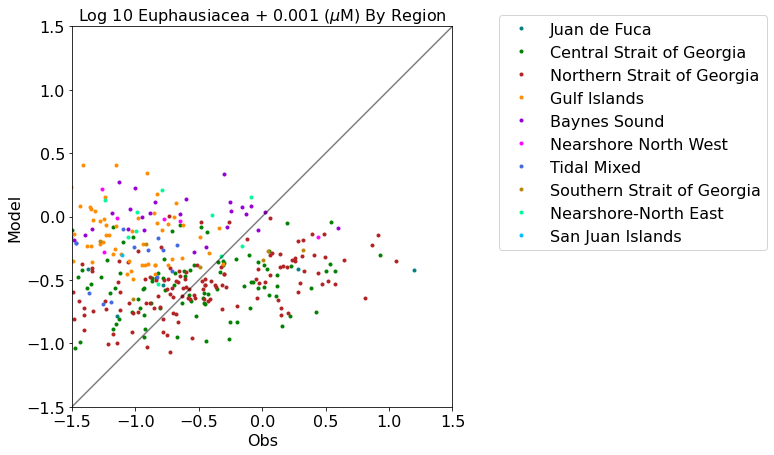

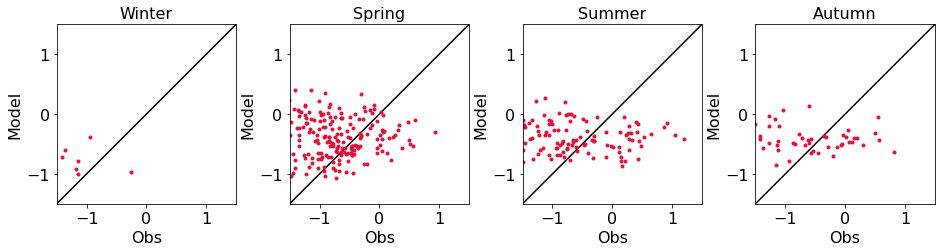

In [914]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Euphausiacea','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Euphausiacea + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Euphausiacea','L10mod_mesozooplankton',(-1.5,1.5))

### Plots of Amphipods vs. model mesozooplankton 2015

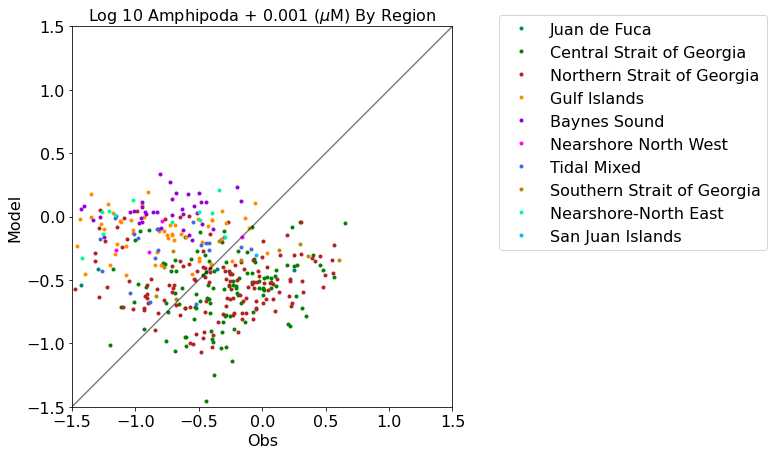

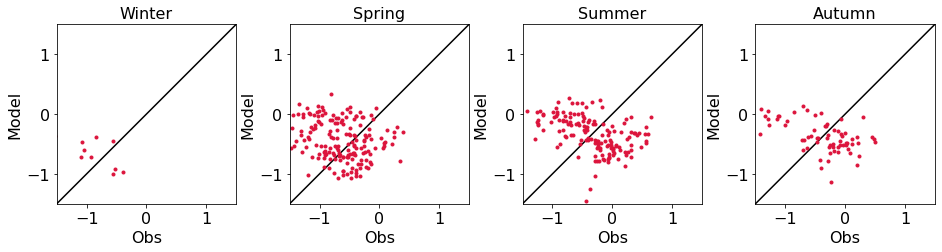

In [915]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Amphipoda','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Amphipoda + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Amphipoda','L10mod_mesozooplankton',(-1.5,1.5))

### Decapods vs. model mesozooplankton 2015

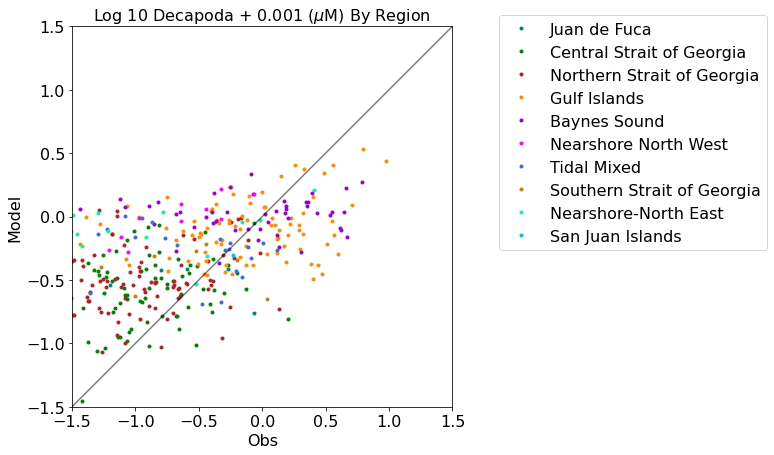

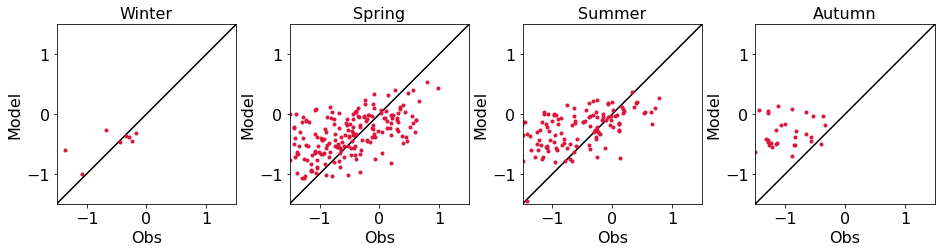

In [916]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Decapoda','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Decapoda + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Decapoda','L10mod_mesozooplankton',(-1.5,1.5))

### Larvaceans vs. model mesozooplankton 2015

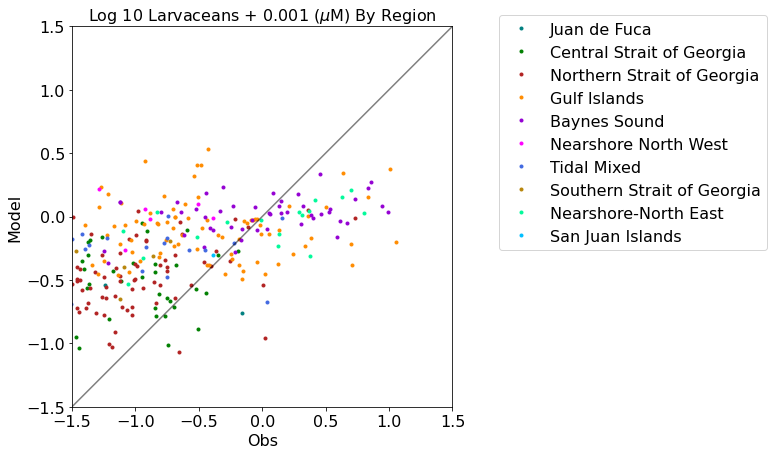

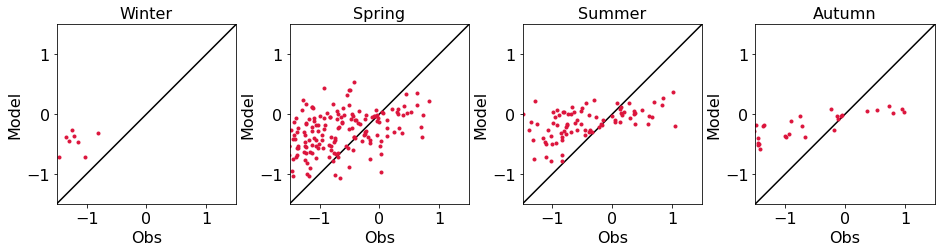

In [921]:
fig, ax = plt.subplots(1,1,figsize = (16,7))
SoG,l=byRegion(ax,'L10Copelata','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Larvaceans + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Copelata','L10mod_mesozooplankton',(-1.5,1.5))

### Plots of Cyclopoid copepods vs. model mesozooplankton 2015

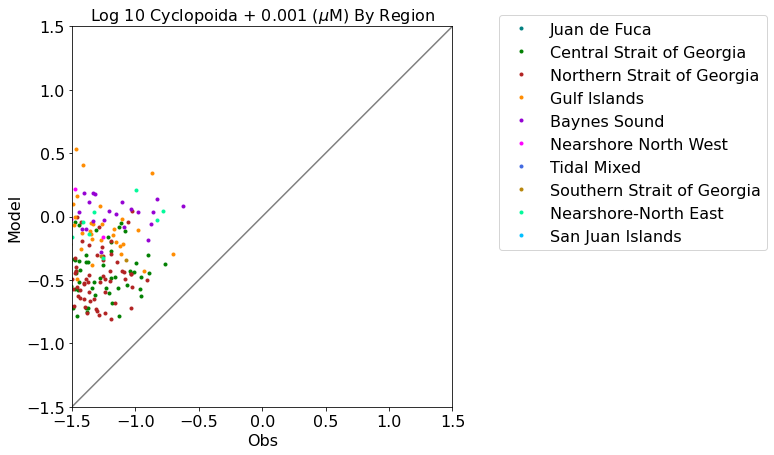

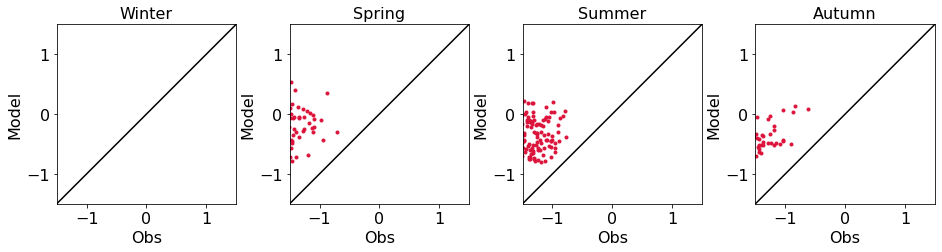

In [918]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))
ax.set_title('Log 10 Cyclopoida + 0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))

### Calanoid copepods vs. model microzooplankton from Mar-Jun 2015

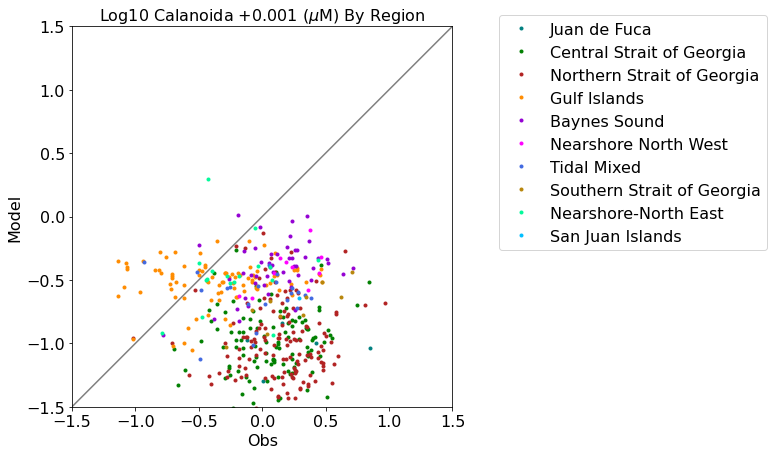

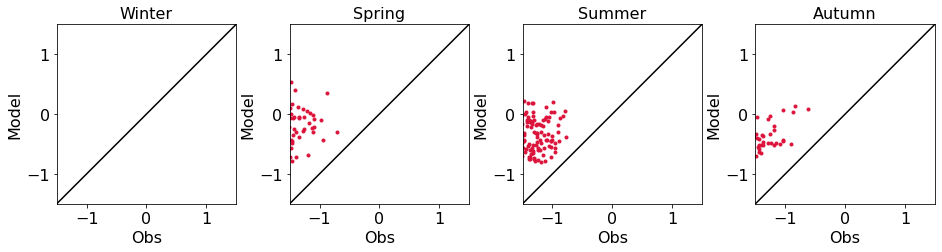

In [919]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Calanoida','L10mod_microzooplankton',(-1.5,1.5))
ax.set_title('Log10 Calanoida +0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Cyclopoida','L10mod_mesozooplankton',(-1.5,1.5))

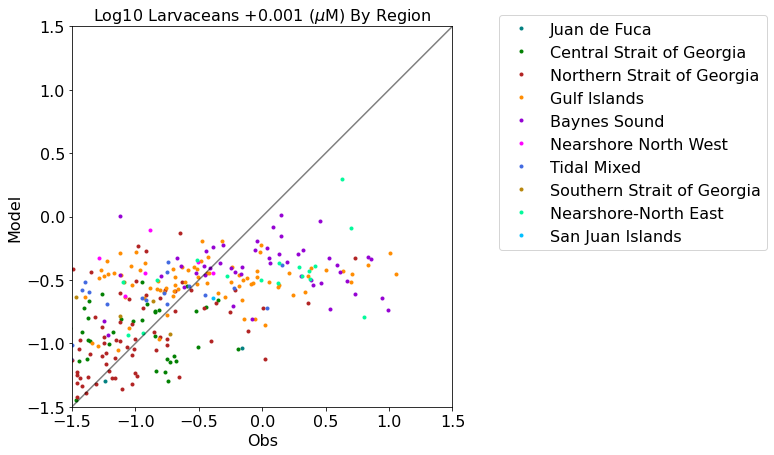

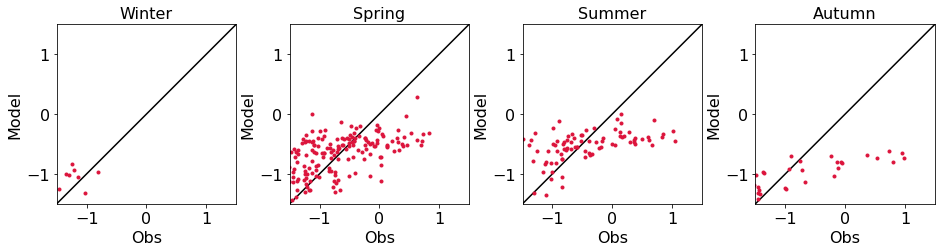

In [920]:
fig, ax = plt.subplots(1,1,figsize = (16,7))

SoG,l=byRegion(ax,'L10Copelata','L10mod_microzooplankton',(-1.5,1.5))
ax.set_title('Log10 Larvaceans +0.001 ($\mu$M) By Region');
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Copelata','L10mod_microzooplankton',(-1.5,1.5))
